In [1]:
import os
import sys

import numpy as np

import pyda
from pyda.dsp.spectral import psd
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large'}
pylab.rcParams.update(params)

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.xydata import XYData
from pyda.dsp.spectral import psd, tfe
import matplotlib.pyplot as plt
import numpy

FigSize = (15,10) # global setting for figure size

In [2]:
A = 1
An = 0.5 # m/sqrt(Hz)
s = A * TSData.sinewave(nsecs=5000, fs=10, f0=1, name='ts1', yunits='m')
ts1 = s + An*TSData.randn(nsecs=5000, fs=10, name="TS1", yunits="m")

print(ts1)


-------- TSData ---------
  name: ((1*ts1) + (0.5*TS1))
  uuid: 2edb499c-a48a-419a-9e8b-fb0aad57bc68
    fs: 10.0
 nsecs: 5000.000000000001
 xaxis: Time=(50000,)[s]
 yaxis: Amplitude=(50000,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------


Processing PSD with segments of length 2381 and overlap of 1573.0 samples (66.1%)
norm = PSD
-------- FSData ---------
  name: PSD(((1*ts1) + (0.5*TS1)))
  uuid: b1349c75-3d61-42bc-b188-40b0922ec5f1
     x: Frequency=(1191,)[Hz]
     y: Amplitude=(1191,)[m^(2)][Hz^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(1191,)[m^(2)][Hz^(-1)]

-----------------------------
Processing PS with segments of length 2381 and overlap of 1573.0 samples (66.1%)
norm = PS
Processing ASD with segments of length 2381 and overlap of 1573.0 samples (66.1%)
norm = ASD
Processing AS with segments of length 2381 and overlap of 1573.0 samples (66.1%)
norm = AS


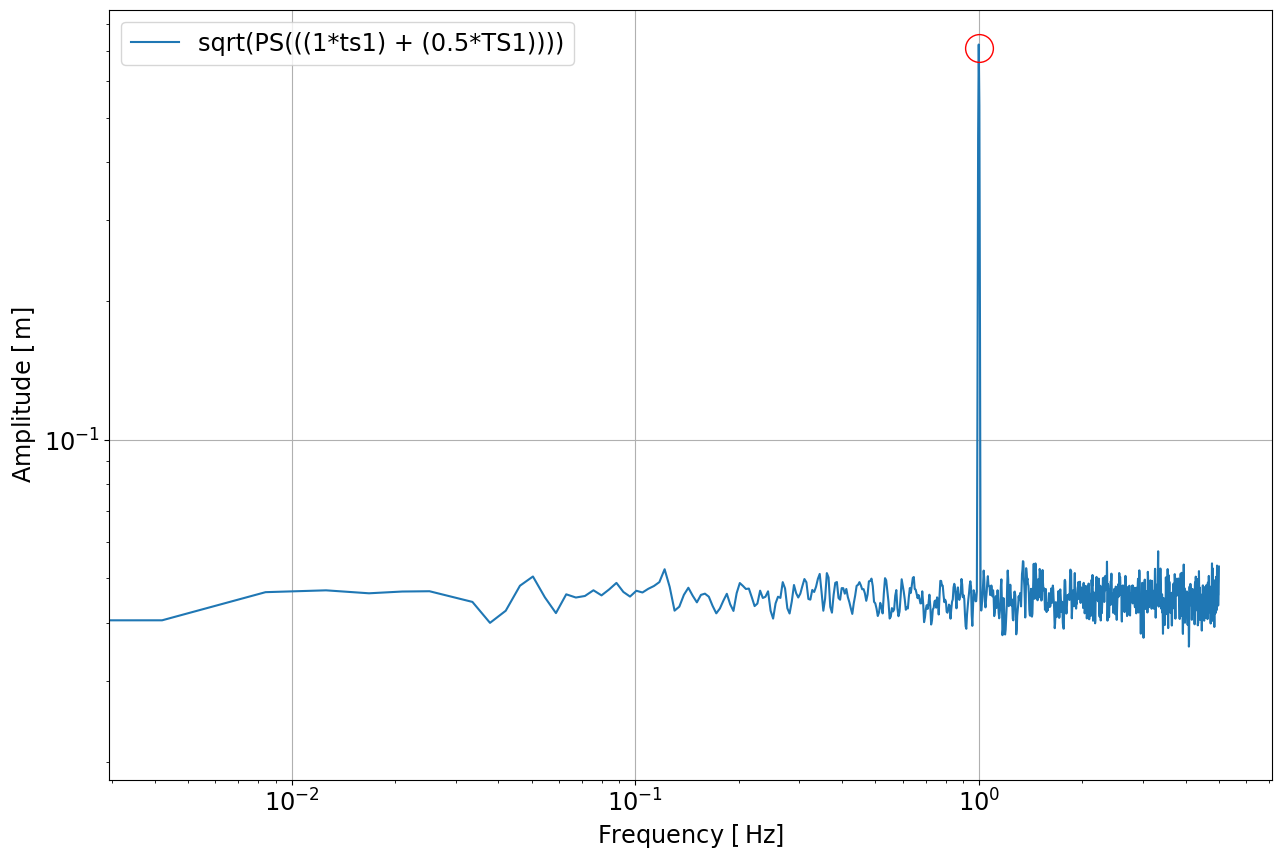

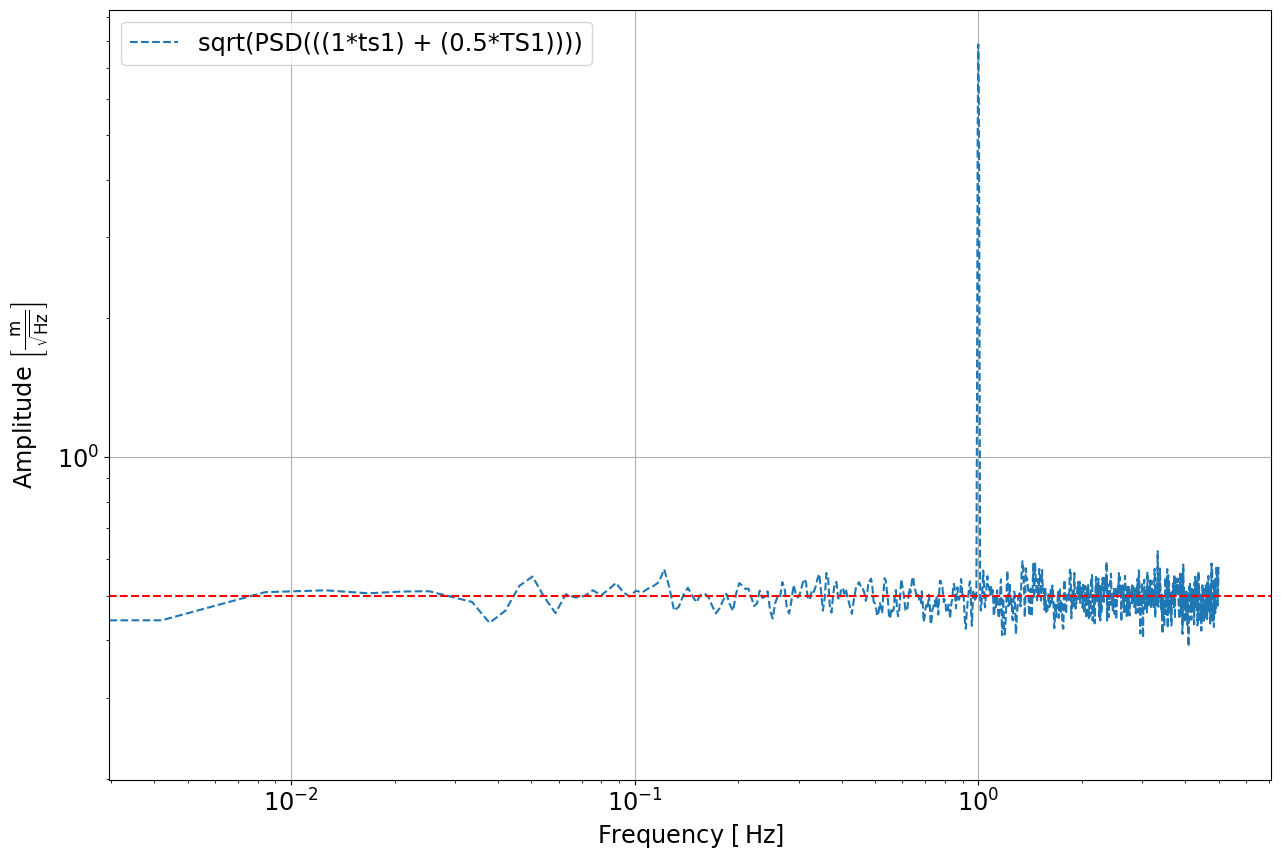

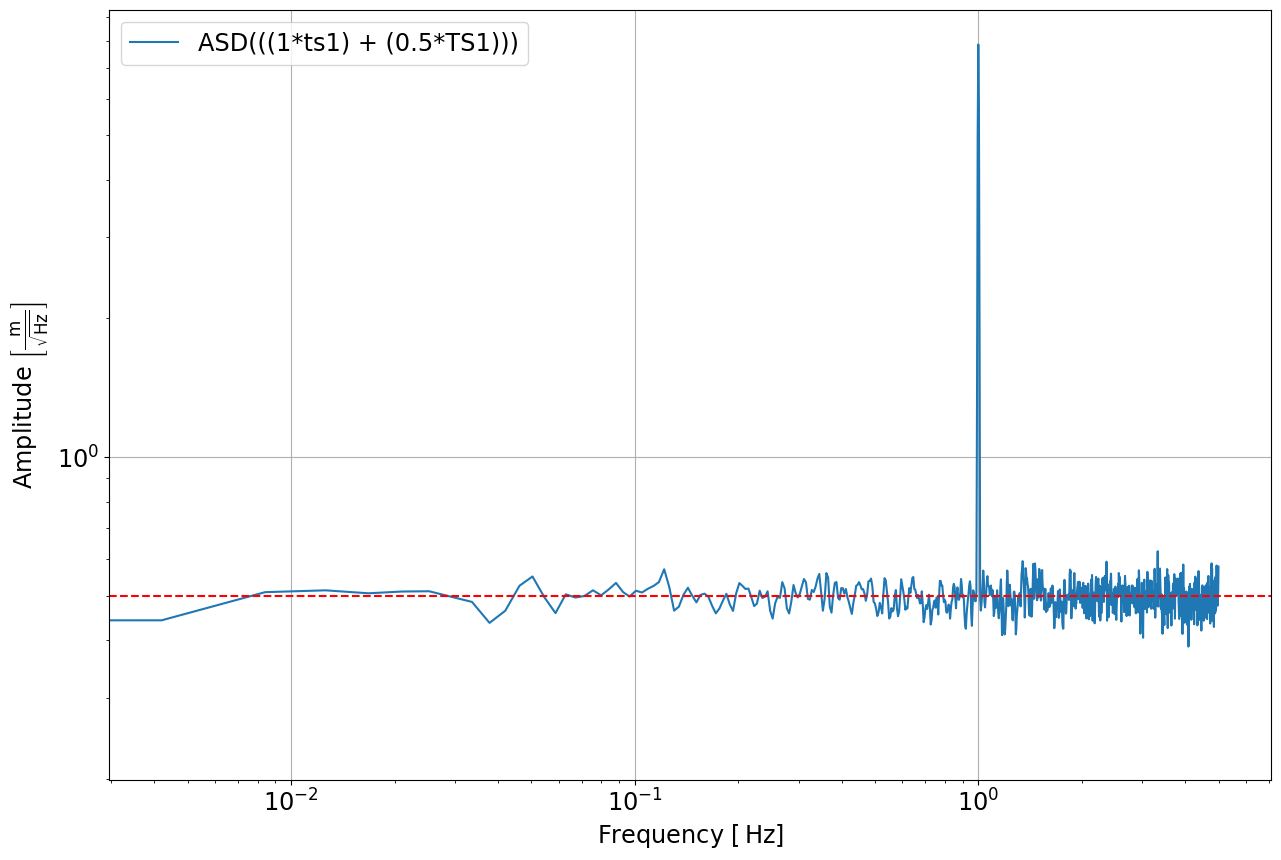

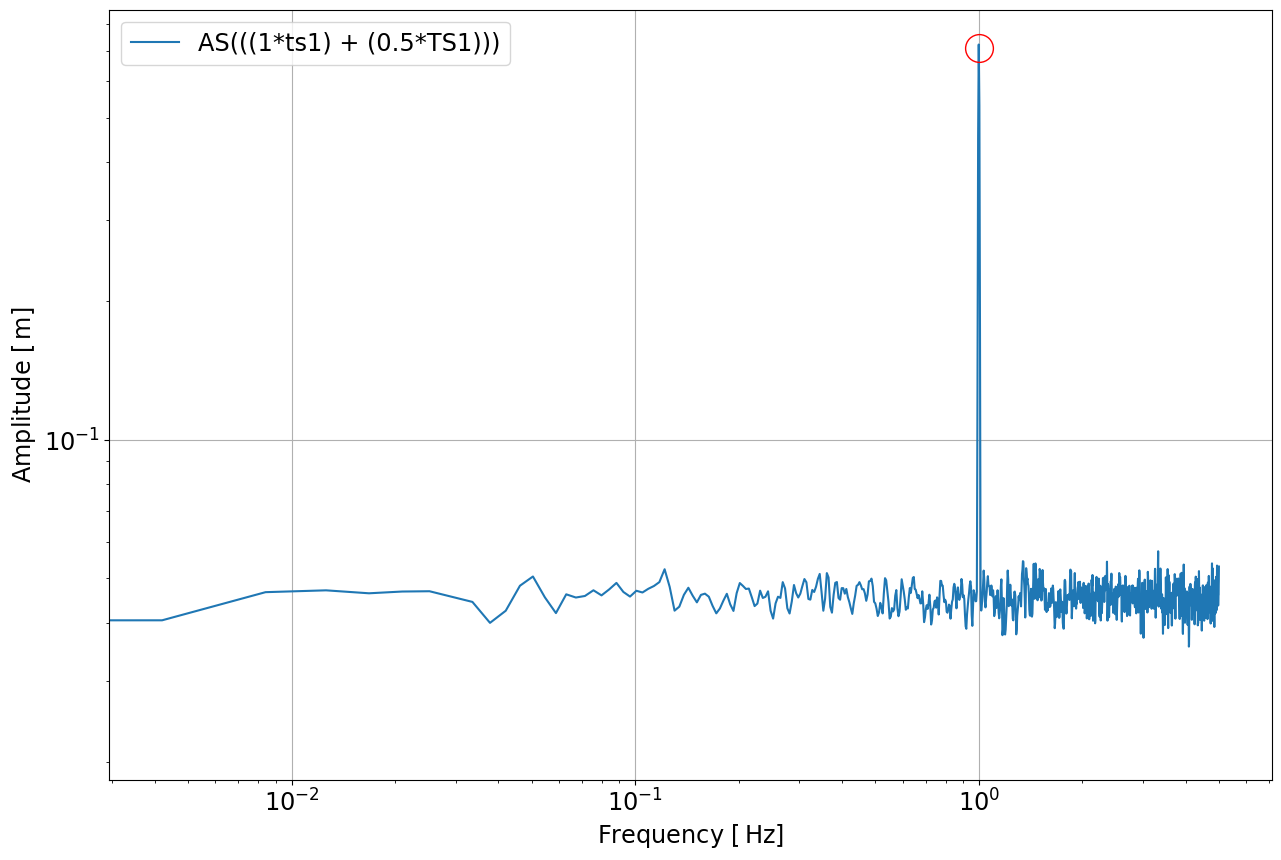

In [3]:

Sxx = psd(ts1, navs=60, window='BH92')
print(Sxx)
Sxx.linestyle = "--"
S = psd(ts1, navs=60, window='BH92', scale="PS")

S.sqrt().loglog()
plt.loglog(1, 1/numpy.sqrt(2), "ro", markersize=20, markerfacecolor="none")

Sxx.sqrt().loglog()
# horizontal line at An
plt.axhline(y=An, color='r', linestyle='--')

# ASD
s_xx = psd(ts1, navs=60, window='BH92', scale="ASD")
s_xx.loglog()
plt.axhline(y=An, color='r', linestyle='--')

# AS
s_x = psd(ts1, navs=60, window='BH92', scale="AS")
s_x.loglog()
plt.loglog(1, 1/numpy.sqrt(2), "ro", markersize=20, markerfacecolor="none")

